## PySCF with OpenFermion

Oxygen bond length optimisation

Based on the examples from:

[https://github.com/quantumlib/OpenFermion-PySCF](https://github.com/quantumlib/OpenFermion-PySCF)

[https://quantumai.google/openfermion/tutorials](https://quantumai.google/openfermion/tutorials)

In [1]:
import io
from ase.io.xyz import write_xyz
from ase.visualize import view
from ase.build import molecule
atoms = molecule('O2')
view(atoms, viewer='x3d')

In [2]:
def create_molecule(bond_length: float):
    f = io.StringIO()
    atoms[0].c=0.
    atoms[1].c=bond_length
    atoms.write(f,format='xyz')
    return [(a.split()[0],(float(a.split()[1]),float(a.split()[2]),float(a.split()[3]))) for a in f.getvalue().split('\n')[2:-1]]

In [3]:
from openfermion.chem import MolecularData
from openfermionpyscf import run_pyscf

# Set molecule parameters.
basis = 'sto-3g'
multiplicity = 1
n_points = 20
bond_length_interval = 1.0 / n_points

# Set calculation parameters.
run_scf = 1
run_mp2 = 1
run_cisd = 0
run_ccsd = 0
run_fci = 1
delete_input = True
delete_output = True

In [4]:
# Generate molecule at different bond lengths.
hf_energies = []
fci_energies = []
bond_lengths = []
best_bond_length=None
best_hf_energy=None

for point in range(1, n_points + 1):
    bond_length = bond_length_interval * float(point) + 1.0
    bond_lengths += [bond_length]
    geometry = create_molecule(bond_length)
    molecule = MolecularData(
        geometry, basis, multiplicity,
        description=str(round(bond_length, 2)))
    
    # Run pyscf.
    molecule = run_pyscf(molecule,
                         run_scf=run_scf,
                         run_mp2=run_mp2,
                         run_cisd=run_cisd,
                         run_ccsd=run_ccsd,
                         run_fci=run_fci)

    # Print out some results of calculation.
    #print(f'\nAt bond length of {bond_length} angstrom, molecular oxygen has:')
    #print(f'Hartree-Fock energy of {molecule.hf_energy} Hartree.')
    #print(f'MP2 energy of {molecule.mp2_energy} Hartree.')
    #print(f'FCI energy of {molecule.fci_energy} Hartree.')
    #print(f'Nuclear repulsion energy between protons is {molecule.nuclear_repulsion} Hartree.')
    #for orbital in range(molecule.n_orbitals):
    #    print(f'Spatial orbital {orbital} has energy of {molecule.orbital_energies[orbital]} Hartree.')
    
    hf_energies += [molecule.hf_energy]
    fci_energies += [molecule.fci_energy]
    
    if not best_bond_length:
        best_bond_length = bond_length
        best_hf_energy = molecule.hf_energy
    elif best_hf_energy > molecule.hf_energy:
        best_hf_energy = molecule.hf_energy
        best_bond_length = bond_length
        

print(f'\nAt bond length of {best_bond_length} angstrom, molecular oxygen has:')
print(f'Hartree-Fock energy of {best_hf_energy} Hartree.')


At bond length of 1.2 angstrom, molecular oxygen has:
Hartree-Fock energy of -147.5504389100644 Hartree.


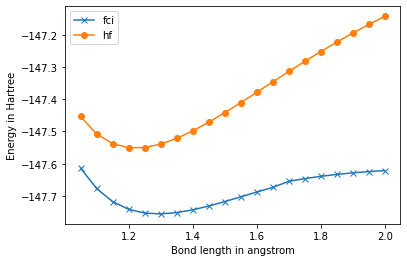

In [5]:
# Plot.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(bond_lengths, fci_energies, 'x-',label='fci')
plt.plot(bond_lengths, hf_energies, 'o-',label='hf')
plt.ylabel('Energy in Hartree')
plt.xlabel('Bond length in angstrom')
plt.legend()
plt.show()

In [6]:
o2_molecule=molecule
one_body_integrals=o2_molecule.one_body_integrals
one_body_integrals

array([[-3.37169097e+01, -9.46700390e-12,  9.22369823e-09,
        -6.24219355e-01,  2.12355420e-16, -2.39172469e-15,
        -1.34673100e-09, -1.61723834e-15,  1.61255176e-15,
         3.82855037e-02],
       [-9.46345466e-12, -3.37175320e+01,  6.06608805e-01,
         9.49105541e-09, -5.15554169e-16,  2.84539727e-15,
        -8.87171659e-02, -1.80126372e-17,  6.81295614e-16,
        -5.81208637e-10],
       [ 9.22369739e-09,  6.06608805e-01, -9.09226175e+00,
        -1.82301634e-12, -1.98048055e-15,  2.32144296e-15,
        -3.02977172e-01, -2.00700687e-15,  8.36592585e-15,
        -7.08760828e-12],
       [-6.24219355e-01,  9.49105607e-09, -1.82357368e-12,
        -9.00586023e+00,  1.98255515e-15, -2.54130785e-15,
        -4.29753868e-12, -1.07134859e-14,  1.40410426e-15,
         4.16940829e-01],
       [ 2.12355420e-16, -5.15554169e-16, -1.98048055e-15,
         1.98255515e-15, -8.51595978e+00,  8.16520417e-13,
         1.19179180e-16,  7.64951234e-17,  1.33226763e-15,
        -1.

In [7]:
from openfermion.transforms import get_fermion_operator, jordan_wigner
o2_qubit_hamiltonian = jordan_wigner(get_fermion_operator(o2_molecule.get_molecular_hamiltonian()))
o2_qubit_hamiltonian

(-91.65570684731581+0j) [] +
(-0.5607764144648345+0j) [X0 X1 Y2 Y3] +
(0.05777121900413748+0j) [X0 X1 Y2 Z3 Z4 Y5] +
(-0.005698502005371837+0j) [X0 X1 Y2 Z3 Z4 Z5 Z6 Z7 Z8 Z9 Z10 Z11 Z12 Y13] +
(0.05777121900413747+0j) [X0 X1 X3 X4] +
(-0.005698502005371836+0j) [X0 X1 X3 Z4 Z5 Z6 Z7 Z8 Z9 Z10 Z11 X12] +
(-0.00884131835558471+0j) [X0 X1 Y4 Y5] +
(0.0007620131020260506+0j) [X0 X1 Y4 Z5 Z6 Z7 Z8 Z9 Z10 Z11 Z12 Y13] +
(0.0007620131020260506+0j) [X0 X1 X5 Z6 Z7 Z8 Z9 Z10 Z11 X12] +
(-0.009420323073062604+0j) [X0 X1 Y6 Y7] +
(0.0009002769353401995+0j) [X0 X1 Y6 Z7 Z8 Z9 Z10 Z11 Z12 Z13 Z14 Z15 Z16 Z17 Z18 Y19] +
(0.0009002769353401995+0j) [X0 X1 X7 Z8 Z9 Z10 Z11 Z12 Z13 Z14 Z15 Z16 Z17 X18] +
(-0.003176206294927073+0j) [X0 X1 Y8 Y9] +
(-0.003290257470529168+0j) [X0 X1 Y10 Y11] +
(-0.003082733761384136+0j) [X0 X1 Y12 Y13] +
(-0.0031762062949270706+0j) [X0 X1 Y14 Y15] +
(-0.0032902574705291664+0j) [X0 X1 Y16 Y17] +
(-0.003656796860989415+0j) [X0 X1 Y18 Y19] +
(0.5607764144648345+0j) [X0 Y1 Y2 

In [8]:
#CAS(2,2)

n_active_electrons = 2
n_active_orbitals = 2

from openfermionpyscf import run_pyscf, generate_molecular_hamiltonian 
molecule = generate_molecular_hamiltonian(                                                                  
    geometry=geometry,                                                                                               
    basis=basis,                                                                                            
    multiplicity=multiplicity,                                                                              
    charge=0,                                                                                         
    n_active_electrons=n_active_electrons,                                                            
    n_active_orbitals=n_active_orbitals)                                                               
    
o2_qubit_hamiltonian_cas22 = jordan_wigner(get_fermion_operator(molecule)) 
o2_qubit_hamiltonian_cas22

(-146.97732554756195+0j) [] +
(-0.07821398428242775+0j) [X0 X1 Y2 Y3] +
(0.07821398428242775+0j) [X0 Y1 Y2 X3] +
(0.07821398428242775+0j) [Y0 X1 X2 Y3] +
(-0.07821398428242775+0j) [Y0 Y1 X2 X3] +
(0.06307413242056999+0j) [Z0] +
(0.14101122864938734+0j) [Z0 Z1] +
(0.06363080639879051+0j) [Z0 Z2] +
(0.14184479068121827+0j) [Z0 Z3] +
(0.06307413242057+0j) [Z1] +
(0.14184479068121827+0j) [Z1 Z2] +
(0.06363080639879051+0j) [Z1 Z3] +
(0.04401853111031684+0j) [Z2] +
(0.1427350525543758+0j) [Z2 Z3] +
(0.04401853111031681+0j) [Z3]

In [9]:
import openfermion

hamiltonian = o2_molecule.get_molecular_hamiltonian()
print(openfermion.get_fermion_operator(hamiltonian))

16.93367074944 [] +
-33.716909691243195 [0^ 0] +
1.2536256732347437 [0^ 0^ 0 0] +
3.406653559489785e-08 [0^ 0^ 0 2] +
0.11919233533541586 [0^ 0^ 0 6] +
-0.012874169374101484 [0^ 0^ 0 18] +
3.406653531744739e-08 [0^ 0^ 2 0] +
1.1215528289296688 [0^ 0^ 2 2] +
-0.11554243800827495 [0^ 0^ 2 4] +
0.011397004010743672 [0^ 0^ 2 12] +
-0.11554243800827496 [0^ 0^ 4 2] +
0.01768263671116942 [0^ 0^ 4 4] +
-0.0015240262040521007 [0^ 0^ 4 12] +
0.11919233533541586 [0^ 0^ 6 0] +
0.018840646146125208 [0^ 0^ 6 6] +
-0.001800553870680399 [0^ 0^ 6 18] +
0.006352412589854146 [0^ 0^ 8 8] +
0.006580514941058335 [0^ 0^ 10 10] +
0.011397004010743676 [0^ 0^ 12 2] +
-0.0015240262040521015 [0^ 0^ 12 4] +
0.006165467522768271 [0^ 0^ 12 12] +
0.006352412589854142 [0^ 0^ 14 14] +
0.006580514941058334 [0^ 0^ 16 16] +
-0.012874169374101477 [0^ 0^ 18 0] +
-0.0018005538706803987 [0^ 0^ 18 6] +
0.007313593721978829 [0^ 0^ 18 18] +
1.2536256732347437 [0^ 1^ 1 0] +
3.406653559489785e-08 [0^ 1^ 1 2] +
0.11919233533541586 